In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
#to draw the plots immediately after the current cell
%matplotlib inline    

warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('/content/sample_data/cooking_data.csv',encoding='latin-1')
df.head()

,id,commentText,Labels
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,7
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,7
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",4
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,2
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,7


In [37]:
new_df = df[['commentText', 'Labels']]

In [38]:
new_df

,commentText,Labels
0,Pudina ptta nhi dalu to,7
1,Chiken kacha tu ni rhy ga sis,7
2,"Hello mam, I love your all recipes.... ðð...",4
3,Its awesome recipe plzz make handi chicken in ...,2
4,Yeh jo measurement hai.........kitne logon ke ...,7
...,...,...
4895,i love chole...thank you kabitaji for sharing ...,1
4896,thnakyou mm,1
4897,thanks mam,1
4898,u r fabulous,4


In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
 #stop words: set of commonly used words in a language (eg: a, are, the, is, etc)

stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 
           'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 
           'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 
           'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 
           'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 
           'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']

print(len(stopwords))

102


Text cleaning

In [41]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


wordnet = WordNetLemmatizer()
#Defining basic cleaning function
def text_preproc(x):
  x=x.lower()
  x=' '.join([word for word in x.split(' ') if word not in stopwords])
  x=x.encode('ascii','ignore').decode()
  x=re.sub(r'https*\S+', ' ',x)
  x=re.sub(r'@\S+',' ', x)
  x=re.sub(r'#\S+', ' ' ,x)
  x=re.sub(r'\'w+', ' ', x)
  x=re.sub('[%s]' % re.escape(string.punctuation), ' ', x )
  x=re.sub(r'\w*\d+\w*', ' ', x)
  x=re.sub(r'\s{2,}', ' ', x)
  return x

In [42]:
new_df['clean_text'] = df.commentText.apply(text_preproc)

In [43]:
df

,id,commentText,Labels
0,Ugy_CBm-_CKA3YqrzcB4AaABAg,Pudina ptta nhi dalu to,7
1,Ugy9mx9nuTWJu4dRac14AaABAg,Chiken kacha tu ni rhy ga sis,7
2,Ugz8T2MKLYucL3dM9nh4AaABAg,"Hello mam, I love your all recipes.... ðð...",4
3,Ugx_1cCjRbCaDgL0FLF4AaABAg,Its awesome recipe plzz make handi chicken in ...,2
4,UgzLhKVAJ6NN3nZXyjN4AaABAg,Yeh jo measurement hai.........kitne logon ke ...,7
...,...,...,...
4895,UgjFXyC0Qhzk5ngCoAEC,i love chole...thank you kabitaji for sharing ...,1
4896,UghP3bitlJuM13gCoAEC,thnakyou mm,1
4897,UghztLZOqvedfXgCoAEC,thanks mam,1
4898,UggX5Fi2Y430zXgCoAEC,u r fabulous,4


In [44]:
df_cleaned = new_df[['clean_text','Labels']]

In [45]:
df_cleaned

,clean_text,Labels
0,pudina ptta nhi dalu,7
1,chiken kacha ni sis,7
2,hello mam i love your all recipes all the ingr...,4
3,its awesome recipe plzz make handi chicken in ...,2
4,measurement hai kitne logon ke hai,7
...,...,...
4895,i love chole thank kabitaji for sharing rhe re...,1
4896,thnakyou mm,1
4897,thanks mam,1
4898,u r fabulous,4


POS tagging

In [46]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

tokens = nltk.word_tokenize(df_cleaned['clean_text'][50])
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['can', 'we', 'skip', 'mint', 'leaves']

In [47]:
nltk.pos_tag(tokens)

[('can', 'MD'),
 ('we', 'PRP'),
 ('skip', 'VB'),
 ('mint', 'NN'),
 ('leaves', 'NNS')]

In [48]:
#individual words considered as tokens
tokenized_text = df_cleaned['clean_text'].apply(lambda x: x.split())
tokenized_text.head()

0                            [pudina, ptta, nhi, dalu]
1                             [chiken, kacha, ni, sis]
2    [hello, mam, i, love, your, all, recipes, all,...
3    [its, awesome, recipe, plzz, make, handi, chic...
4            [measurement, hai, kitne, logon, ke, hai]
Name: clean_text, dtype: object

In [49]:
#using Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#for each word in sentence we are gng to stem that word ie narrow to single word
#eg:stemming can be done to make fighter, figting, fights etc into single word fight
tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()

0                            [pudina, ptta, nhi, dalu]
1                              [chiken, kacha, ni, si]
2    [hello, mam, i, love, your, all, recip, all, t...
3    [it, awesom, recip, plzz, make, handi, chicken...
4                  [measur, hai, kitn, logon, ke, hai]
Name: clean_text, dtype: object

In [50]:
#combining to single string/sentence
for i in range(len(tokenized_text)):
  tokenized_text[i] = " ".join(tokenized_text[i]) #combines all individual words into a sentence


In [51]:
df_cleaned['clean_text'] = tokenized_text
df_cleaned

,clean_text,Labels
0,pudina ptta nhi dalu,7
1,chiken kacha ni si,7
2,hello mam i love your all recip all the ingred...,4
3,it awesom recip plzz make handi chicken in handi,2
4,measur hai kitn logon ke hai,7
...,...,...
4895,i love chole thank kabitaji for share rhe reci...,1
4896,thnakyou mm,1
4897,thank mam,1
4898,u r fabul,4


In [52]:
df_cleaned['Labels'].value_counts()

7    700
4    700
2    700
5    700
1    700
3    700
6    700
Name: Labels, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

y=df.iloc[:,1].values
labelEnocder_y=LabelEncoder()
y=labelEnocder_y.fit_transform(y)

In [55]:
# making matrix of most common words with countVectorizer it is used to make vocabulary   
cv=CountVectorizer(max_features=2500)
x=cv.fit_transform(new_df['clean_text']).toarray()

In [56]:
#spliting dataset into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


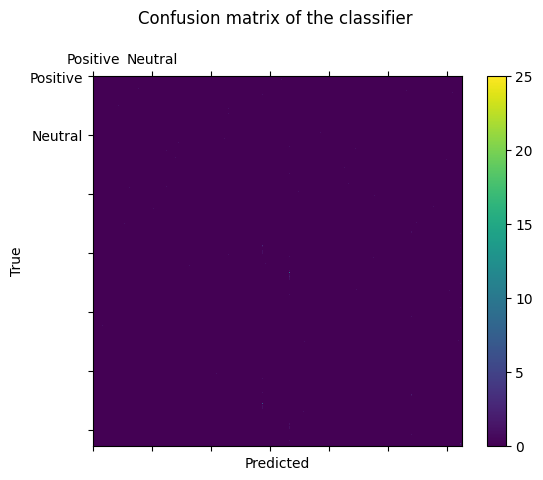

Accuracy is 0.06836734693877551 


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='auto')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
labels=['Positive','Neutral']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))